In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:


# Load the .dta file into a DataFrame
df = pd.read_stata("/workspaces/DUKE_IDS789_Final_Project/50_LSTM_Model/data2.dta")

# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns



In [26]:
df['deposits']

0       22917.257
1       23575.192
2       24308.965
3       24967.964
4       25673.746
5       26941.332
6       27141.405
7       27133.355
8       28651.198
9       29041.646
10      29089.391
11      28841.488
12      28715.469
13      30084.121
14      30114.432
15      30112.629
16      29670.701
17      30050.617
18      28929.456
19      27407.592
20      22463.251
21      22035.364
22      20782.366
23      18774.087
24      17379.316
25      17271.554
26      17116.974
27      16174.668
28      15608.863
29      14608.075
30      14221.318
31      13563.401
32      12346.514
33      12891.298
34      12849.570
35      12820.298
36      12835.764
37      13076.471
38      12820.749
39      13615.144
40      13540.975
41      14902.538
42      16234.489
43      17347.679
44      19601.736
45      20006.570
46      21032.702
47      21713.071
48      23586.351
49      29857.148
50      30391.749
51      31328.406
52      40035.438
53      42298.856
54      43752.527
55      45

In [3]:
df_cleaned = df.dropna(axis=1)

In [4]:
df_reduced = df_cleaned.iloc[:, 3:-7]

In [5]:
df_reduced= df_reduced.drop(columns=['deposits'])


In [6]:


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(df_reduced)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=14)
feature_pca = pca.fit_transform(feature_scaled)

# Check the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with {pca.n_components_} components: {explained_variance:.2f}")

Explained variance with 14 components: 1.00


In [7]:
df_test

NameError: name 'df_test' is not defined

In [8]:
df_train = df.iloc[:-20].copy()
df_test = df.drop(df_train.index).copy()


In [8]:
dep_train = df['deposits'].iloc[:-20].copy()
date_train = df['time'].iloc[:-20].copy()
#tv_test = df.drop(tv_train.index).copy()
dep_test = df.drop(dep_train.index).copy()
date_test = df.drop(date_train.index).copy()




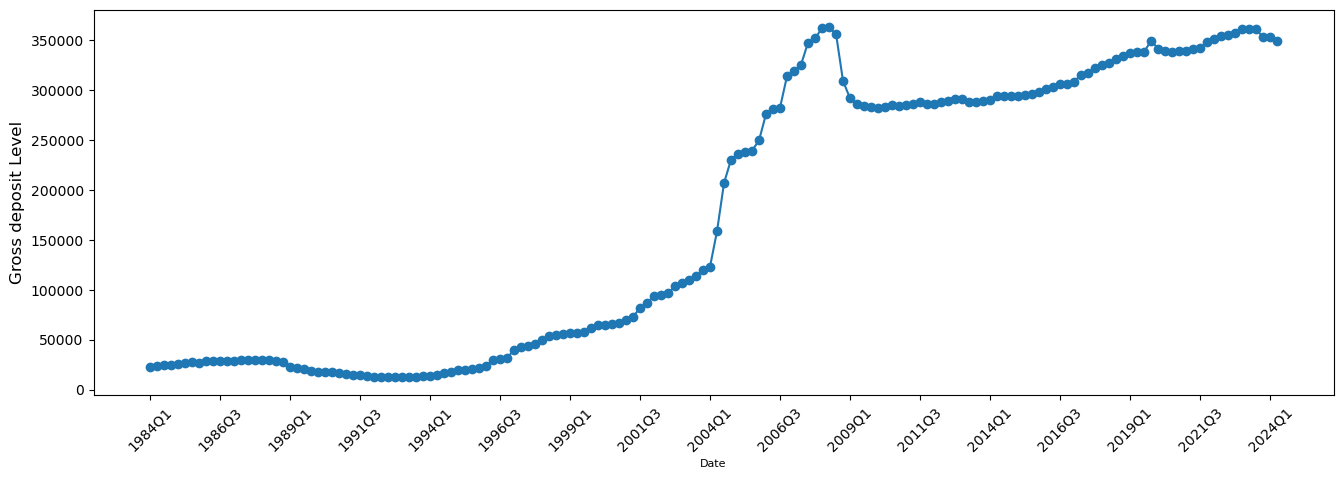

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


plt.figure(figsize=(16,5))

plt.plot(df.time,
            df.deposits,
            '-o')

plt.xticks(df.time[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)

plt.show()

In [10]:
import statsmodels.api as sm

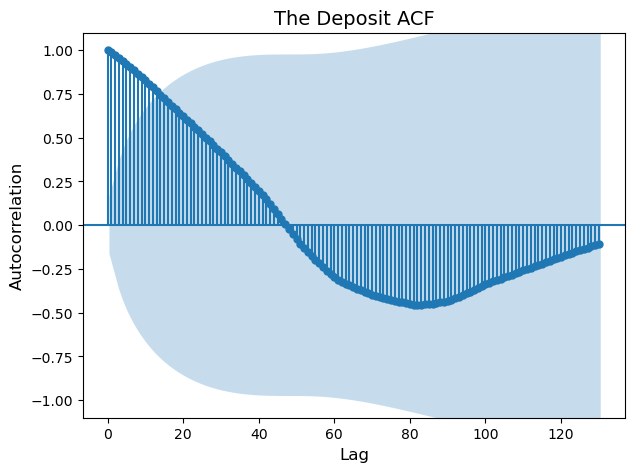

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(dep_train.values,
                            lags = 130,
                            ax = ax)

plt.title('The Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

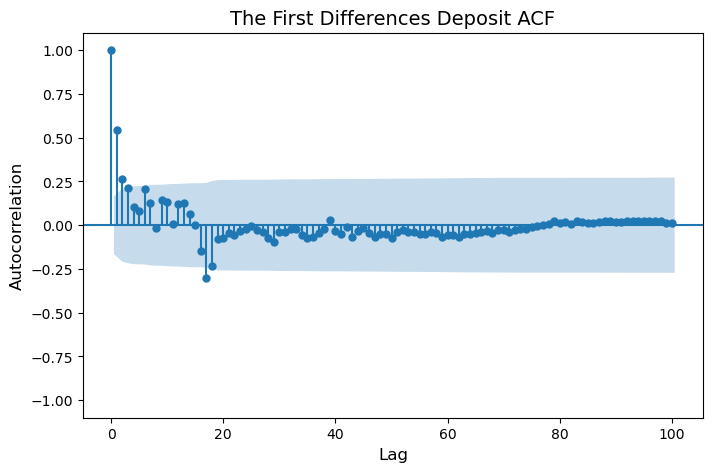

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(dep_train.diff(1).values[1:],
                               lags=100,
                               ax=ax)

plt.title('The First Differences Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

#some changes

In [12]:
from statsmodels.tsa.api import ARIMA

In [13]:
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom


In [15]:
from sklearn.model_selection import TimeSeriesSplit
!pip install pmdarima
from pmdarima import auto_arima

In [16]:
cv = TimeSeriesSplit(n_splits=10, test_size=3)


In [17]:
model = auto_arima(dep_train.values, trace=True, max_p=10, max_q=10,seasonal=True,scoring=mase)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2903.758, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2943.955, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2900.200, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2904.795, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2952.219, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2901.935, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2901.752, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2903.182, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2900.926, Time=0.00 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.174 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1447.100
Date:                Thu, 05 Dec 2024   AIC      

In [18]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 8):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D = 1,
                d=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
            
    
    # Average MASE score across folds
    avg_score = np.mean(fold_scores)
    print(f"  Average MASE for m={m}: {avg_score:.4f}")
    print(model)
    results[m] = avg_score
    
    # Update the best m if the average score is lower
    if avg_score < best_score:
        best_score = avg_score
        best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
  Fold 1
    MASE: 3.2897
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 2
    MASE: 3.2994
 ARIMA(1,1,1)(0,0,0)[0]          
  Fold 3
    MASE: 7.9780
 ARIMA(1,1,1)(0,0,0)[0] intercept
  Fold 4
    MASE: 3.1261
 ARIMA(0,1,1)(0,0,0)[0] intercept
  Fold 5
    MASE: 0.4697
 ARIMA(1,1,0)(0,0,0)[0]          
  Average MASE for m=1: 3.6326
 ARIMA(1,1,0)(0,0,0)[0]          
Evaluating seasonal period m=2
  Fold 1
    MASE: 0.8923
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 2
    MASE: 1.9255
 ARIMA(0,1,0)(0,1,1)[2]          
  Fold 3
    MASE: 5.1601
 ARIMA(0,1,0)(0,1,1)[2]          
  Fold 4
    MASE: 5.9433
 ARIMA(0,1,1)(0,1,1)[2]          
  Fold 5
    MASE: 0.1584
 ARIMA(1,1,1)(0,1,2)[2]          
  Average MASE for m=2: 2.8159
 ARIMA(1,1,1)(0,1,2)[2]          
Evaluating seasonal period m=3
  Fold 1
    MASE: 1.5120
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 2
    MASE: 0.7953
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 3
    MASE: 3.8562
 ARIMA(2,1,2)(0,1,0)[3]        

In [38]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 8):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            dep_train.values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            d=1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
Fitting ARIMA model for m=1 on the entire training set...
Fitted model for m=1
  Fold 1
    MASE: 80.9343
 ARIMA(1,1,0)(0,0,0)[0] intercept
  Fold 2
    MASE: 42.8324
 ARIMA(1,1,0)(0,0,0)[0] intercept
  Fold 3
    MASE: 11.9318
 ARIMA(1,1,0)(0,0,0)[0] intercept
  Fold 4
    MASE: 2.5725
 ARIMA(1,1,0)(0,0,0)[0] intercept
  Fold 5
    MASE: 1.2875
 ARIMA(1,1,0)(0,0,0)[0] intercept
  Average MASE for m=1: 27.9117
Evaluating seasonal period m=2
Fitting ARIMA model for m=2 on the entire training set...
Fitted model for m=2
  Fold 1
    MASE: 81.7280
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 2
    MASE: 43.3106
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 3
    MASE: 12.2036
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 4
    MASE: 2.6876
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 1.3683
 ARIMA(1,1,0)(1,1,1)[2]          
  Average MASE for m=2: 28.2596
Evaluating seasonal period m=3
Fitting ARIMA model for m=3 on the entire training set...
Fitted model for m=3


In [28]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#best fold MASE
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_scores = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 39
for m in range(1, 8):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(df['deposits'])):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = df['deposits'].values[train_idx], df['deposits'].values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D=1,
                d=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Average MASE score across folds
    print(model)
    results[m] = [score,model,fold]
   


# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best MASE: {best_scores:.4f}")
sorted_results = sorted(results.items(), key=lambda x: x[1][0])
print(sorted_results[1])


Evaluating seasonal period m=1
  Fold 1
    Failed for m=1, fold=1: division by zero
  Fold 2
    MASE: 2.6471
 ARIMA(2,1,2)(0,0,0)[0] intercept
  Fold 3
    MASE: 8.6249
 ARIMA(5,1,0)(0,0,0)[0] intercept
  Fold 4
    MASE: 0.2407
 ARIMA(1,1,0)(0,0,0)[0]          
  Fold 5
    MASE: 0.1514
 ARIMA(1,1,0)(0,0,0)[0] intercept
 ARIMA(1,1,0)(0,0,0)[0] intercept
Evaluating seasonal period m=2
  Fold 1
    Failed for m=2, fold=1: division by zero
  Fold 2
    MASE: 3.4399
 ARIMA(0,1,0)(0,1,1)[2]          
  Fold 3
    MASE: 6.2433
 ARIMA(0,1,0)(0,1,1)[2]          
  Fold 4
    MASE: 0.5690
 ARIMA(1,1,1)(1,1,1)[2]          
  Fold 5
    MASE: 0.1745
 ARIMA(1,1,0)(1,1,1)[2]          
 ARIMA(1,1,0)(1,1,1)[2]          
Evaluating seasonal period m=3
  Fold 1
    Failed for m=3, fold=1: division by zero
  Fold 2
    MASE: 2.6519
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 3
    MASE: 6.5501
 ARIMA(0,1,0)(0,1,2)[3]          
  Fold 4
    MASE: 0.4658
 ARIMA(1,1,0)(0,1,1)[3]          
  Fold 5
    MASE

In [42]:
sorted_results[1]


(6,
 [0.08152839962928767,
  ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 6),
        suppress_warnings=True, with_intercept=False),
  4])

In [18]:
from sklearn.model_selection import TimeSeriesSplit

# Example time series data (replace with your actual data)
time_series_data = dep_train.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

# Iterate over the splits and print the indices
for fold, (train_idx, test_idx) in enumerate(tscv.split(time_series_data)):
    print(f"Fold {fold + 1}")
    print(f"  Train indices: {train_idx}")
    print(f"  Test indices: {test_idx}")
    print(f"  Train data: {time_series_data[train_idx]}")
    print(f"  Test data: {time_series_data[test_idx]}")


Fold 1
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
  Test indices: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
  Train data: [22917.257 23575.192 24308.965 24967.964 25673.746 26941.332 27141.405
 27133.355 28651.198 29041.646 29089.391 28841.488 28715.469 30084.121
 30114.432 30112.629 29670.701 30050.617 28929.456 27407.592 22463.251
 22035.364 20782.366 18774.087 17379.316 17271.554 17116.974]
  Test data: [16174.668 15608.863 14608.075 14221.318 13563.401 12346.514 12891.298
 12849.57  12820.298 12835.764 13076.471 12820.749 13615.144 13540.975
 14902.538 16234.489 17347.679 19601.736 20006.57  21032.702 21713.071
 23586.351 29857.148]
Fold 2
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
  Test indices: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
  T

In [46]:
#arima = ARIMA(dep_train.values,order=(1, 1, 0), D = 1, m=5).fit()

sarima = ARIMA(df['deposits'].values,
                    order = (2,1,0),
                    seasonal_order = (2,1,1,4)).fit()
sarima.summary()
#(2,0,0)(0,1,1)[7]
#(2,0,0)(0,1,1)[6] 
# ARIMA(1,1,0)(2,1,1)[5]    
#(3,1,1)(0,1,1)[4] 
#(1,1,0)(0,1,1)[6] 
#(1,1,0)(0,0,0)[0]
#(3,1,1)(0,1,1)[4]        
#2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  162
Model:             ARIMA(2, 1, 0)x(2, 1, [1], 4)   Log Likelihood               -1625.914
Date:                           Mon, 09 Dec 2024   AIC                           3263.827
Time:                                   00:07:17   BIC                           3282.165
Sample:                                        0   HQIC                          3271.275
                                           - 162                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5413      0.081      6.648      0.000       0.382       0.701
ar.L2          0.0104      0.160      0.065      0.948      -0.303       0.324
ar.S.L4       -0.0118      0.175     -0.067      0.946      -0.355       0.331
ar.S.L8       -0.1884      0.135     -1.395      0.163      -0.453       0.076
ma.S.L4       -0.9249      0.095     -9.706      0.000      -1.112      -0.738
sigma2      8.893e+07   8.37e-10   1.06e+17      0.000    8.89e+07    8.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1136.65
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             0.26
Prob(H) (two-sided):                  0.03   Kurtosis:                        16.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+32. Standard errors may be unstable.
"""

In [30]:
#MASE analysis:

test_mase = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima.forecast(len(date_test)))


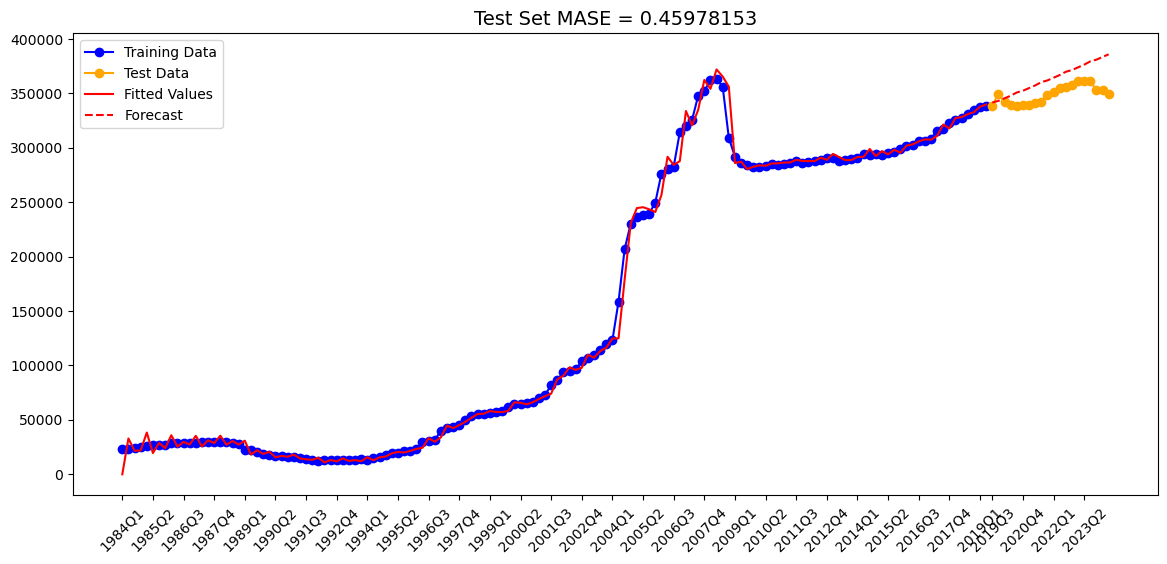

NameError: name 'y_preds' is not defined

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_test.time,
         sarima.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

rmse = np.sqrt(np.mean((np.array(dep_test.deposits) - np.array(y_preds))**2))
print("RMSE:", rmse)

mae = np.mean(np.abs(np.array(dep_test.deposits) - np.array(y_preds)))
print("MAE:", mae)

nom_mae = np.sqrt(np.mean((np.array(dep_test.deposits) - np.array(y_preds))**2))/np.mean(np.array(y_test))
print("RMSE:", nom_mae)

nom_rmse = np.mean(np.abs(np.array(dep_test.deposits) - np.array(y_preds)))/np.mean(np.array(y_test))
print("MAE:", nom_rmse)







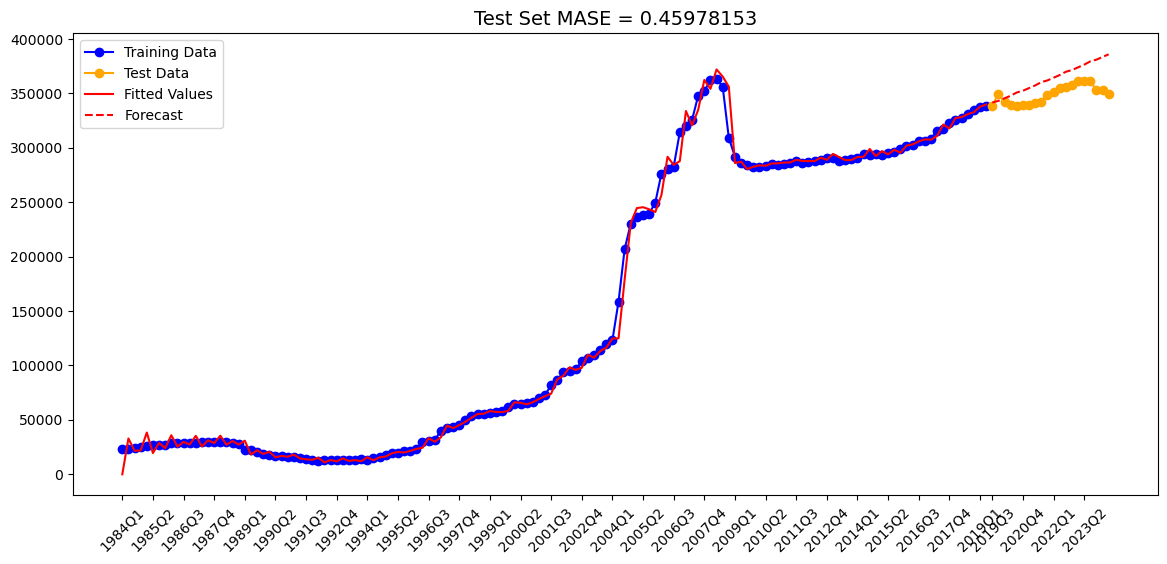

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_test.time,
         sarima.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()


In [22]:


# Function to generate future quarters
def generate_future_quarters(start, num_quarters):
    """Generate future quarterly periods starting from a given quarter."""
    year, quarter = map(int, start.split("Q"))
    future_quarters = []
    for _ in range(num_quarters):
        quarter += 1
        if quarter > 4:  # Wrap around to the next year
            quarter = 1
            year += 1
        future_quarters.append(f"{year}Q{quarter}")
    return future_quarters

# Generate 8 future quarters
last_quarter = date_test.time.iloc[-1]  # Get the last quarter in the series
future_quarters = generate_future_quarters(last_quarter, 16)  # Generate 8 future quarters

# Append future quarters to the original time series using pd.concat
extended_time_series = pd.concat([date_test.time, pd.Series(future_quarters)], ignore_index=True)

# Display the result
print(extended_time_series)


0     2019Q3
1     2019Q4
2     2020Q1
3     2020Q2
4     2020Q3
5     2020Q4
6     2021Q1
7     2021Q2
8     2021Q3
9     2021Q4
10    2022Q1
11    2022Q2
12    2022Q3
13    2022Q4
14    2023Q1
15    2023Q2
16    2023Q3
17    2023Q4
18    2024Q1
19    2024Q2
20    2024Q3
21    2024Q4
22    2025Q1
23    2025Q2
24    2025Q3
25    2025Q4
26    2026Q1
27    2026Q2
28    2026Q3
29    2026Q4
30    2027Q1
31    2027Q2
32    2027Q3
33    2027Q4
34    2028Q1
35    2028Q2
dtype: object


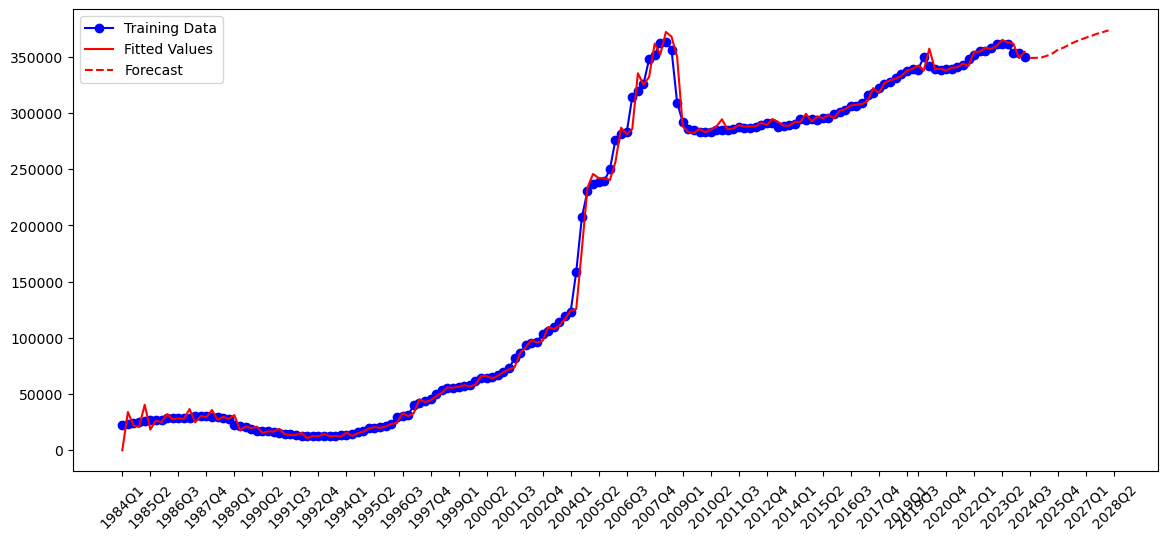

In [60]:

# Forecasting and plotting for test data
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], extended_time_series[::5],])

# Plot training data
plt.plot(np.concatenate([date_train, extended_time_series[0:20]]),   df['deposits'],
         'b-o',
         label='Training Data')


# Plot fitted values for training data
plt.plot(np.concatenate([date_train, extended_time_series[0:20]]),
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

plt.plot(extended_time_series[20:-1],
         sarima.forecast(15),
         '--r',
         label="Forecast")

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()






In [61]:
sarima.forecast(15)

array([348858.46124632, 348998.65867447, 349300.2655128 , 350854.44097262,
       352974.81579972, 356409.98252137, 358187.62118075, 360798.18326308,
       363215.63440418, 365158.26894569, 366995.00526711, 368629.16568558,
       370556.26892939, 371909.505783  , 373475.1546841 ])

In [63]:
extended_time_series[20:-1]

20    2024Q3
21    2024Q4
22    2025Q1
23    2025Q2
24    2025Q3
25    2025Q4
26    2026Q1
27    2026Q2
28    2026Q3
29    2026Q4
30    2027Q1
31    2027Q2
32    2027Q3
33    2027Q4
34    2028Q1
dtype: object

In [24]:
 sarima.forecast(len(date_test)+16)

array([341588.41393253, 343131.38184324, 345469.0532581 , 347853.37642034,
       350847.54253706, 352422.6765092 , 354862.41510793, 357311.02531099,
       360331.92252813, 361928.43464263, 364383.16884162, 366840.20601978,
       369866.58099107, 371466.77359139, 373923.79096775, 376382.27447545,
       379409.58954673, 381010.38052753, 383467.77807416, 385926.5055503 ,
       388953.97660374, 390554.86704082, 393012.32818358, 395471.09632182,
       398498.59334226, 400099.5003717 , 402556.97211947, 405015.74703336,
       408043.24838304, 409644.15817902, 412101.63169455, 414560.40773796,
       417587.90980941, 419188.82006657, 421646.2938768 , 424105.07010852])

In [23]:
sarima1 = ARIMA(dep_train.values,
                    order = (1,1,0),
                    seasonal_order = (0,1,1,6)).fit()
sarima1.summary()

test_mase1 = mase(y_train = dep_train.values, y_test = dep_test.deposits.values, y_preds = sarima1.forecast(len(date_test)))


In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming df_X and df['Deposits'] are defined

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_reduced, df['deposits'], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the pipeline
lasso = Lasso(max_iter=5000)
rfe = RFE(estimator=lasso)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is part of the pipeline
    ('feature_selection', rfe)
])

# Define the parameter grid
param_grid = {
    'feature_selection__estimator__alpha': [0.1, 1, 10, 100, 500, 1000, 5000],
    'feature_selection__n_features_to_select': list(range(10, 15))  # Test n_features_to_select from 1 to 20
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_alpha = grid_search.best_params_['feature_selection__estimator__alpha']
best_n_features = grid_search.best_params_['feature_selection__n_features_to_select']
print(f"Best alpha: {best_alpha}")
print(f"Best n_features_to_select: {best_n_features}")

# Use the best parameters
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
selector_best = RFE(estimator=lasso_best, n_features_to_select=best_n_features)
selector_best.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector_best.get_support()
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on optimized RFE and Lasso: {selected_features}")


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+08, tolerance: 2.165e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+08, tolerance: 2.165e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

Best alpha: 100
Best n_features_to_select: 14
Selected features based on optimized RFE and Lasso: [ 5  8 15 16 18 22 25 27 29 33 43 50 58 62]


In [169]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df_X and df['Deposits'] are defined

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_reduced, df['deposits'], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso as the estimator for RFE
lasso = Lasso(alpha=100, max_iter=5000)

# Initialize RFE with Lasso as the estimator
selector = RFE(estimator=lasso, n_features_to_select=20)

# Fit the RFE model to the data
selector = selector.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector.get_support()

# Print which features are selected
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on RFE with Lasso: {selected_features}")

print("Feature Ranking:", selector.ranking_)

# Retrieve the importance of selected features
print("Feature Coefficients:", selector.estimator_.coef_)


Selected features based on RFE with Lasso: [ 5  8 11 13 14 15 16 18 22 25 27 29 33 43 50 51 52 58 60 62]
Feature Ranking: [47 46 45 44 43  1 13 11  1  7  5  1  3  1  1  1  1 20  1 24 23 15  1 25
 26  1 30  1 34  1 31 35 37  1 41 42 40 22 12 14  6 19 17  1  8  9 10 16
 18 21  1  1  1 27 29 28 32  4  1 33  1  2  1 36 38 39]
Feature Coefficients: [  1825.17789705   3826.04944309    326.27714062      0.
  -1219.61453207   2926.28384545   2231.8844341   -7486.27934145
  -2935.4618794   -2040.94747719   4651.00975357   6410.02227397
 108714.64531823   4310.39615577  14813.71590715    384.52317297
    729.98464923  -3087.00295793   -660.12918705   6193.34258776]


In [32]:
# Example DataFrame
import pandas as pd

# List of indices
indices_to_pick =  [ 5,  8, 15, 16, 18, 22, 25, 27, 29, 33, 43, 50, 58, 62]
print(f"Selected features based on RFE with Lasso: {selected_features}")

print("Feature Ranking:", selector_best.ranking_)

# Retrieve the importance of selected features
print("Feature Coefficients:", selector_best.estimator_.coef_)
# Display column names corresponding to the indices
selected_columns_ind = df_reduced.columns[indices_to_pick]
print("Selected Columns:", list(selected_columns_ind))



Selected features based on RFE with Lasso: [ 5  8 15 16 18 22 25 27 29 33 43 50 58 62]
Feature Ranking: [53 52 51 50 49  1 19 17  1 13 11  6  9  7  2  1  1 26  1 30 29 21  1 31
 32  1 36  1 40  1 37 41 43  1 47 48 46 28 18 20 12 25 23  1 14 15 16 22
 24 27  1  4  5 33 35 34 38 10  1 39  3  8  1 42 44 45]
Feature Coefficients: [  1676.00661612   4203.81873129   2793.01067282   4224.36298949
  -7835.97160148  -3817.67455841  -1481.22066991   3768.80968232
   7005.28549251 107667.74101459   3830.43335999  16855.51223316
  -2753.34254952   5093.29995994]
Selected Columns: ['loans_farmland', 'loans_cc', 'accept_banks', 'lease_receiv', 'loans_leases', 'sec_avail_sale', 'sec_equity', 'fed_funds_sold', 'trading_assets', 'goodwill', 'borrowed_other', 'stock_common', 'loans_restructured', 'assets_earning']


In [36]:
selected_columns = df_reduced.iloc[:, indices_to_pick]

train_features = scaler.fit_transform(selected_columns.iloc[:-20])
test_features = scaler.transform(selected_columns.iloc[-20:])

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]
#(3,1,1)(0,1,1)[4]        
model = SARIMAX(
    endog = dep_train.values,
    exog = train_features,  # Pass None if no exogenous variables
    order = (1,1,0), # Example: (1, 1, 1) 
    seasonal_order = (0,1,1,6),  # Example: (1, 1, 1, 12) for yearly seasonality
)
sarima_fea = model.fit(disp=False)
sarima_fea.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  142
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 6)   Log Likelihood               -1285.736
Date:                             Thu, 05 Dec 2024   AIC                           2605.472
Time:                                     21:54:50   BIC                           2654.862
Sample:                                          0   HQIC                          2625.543
                                             - 142                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1328.1383   3793.628     -0.350      0.726   -8763.513    6107.236
x2            29.3021   3304.583      0.009      0.993   -6447.561    6506.166
x3           383.1455   3513.512      0.109      0.913   -6503.211    7269.502
x4         -1.024e+04   9861.877     -1.038      0.299   -2.96e+04    9089.881
x5          2754.8455   6953.192      0.396      0.692   -1.09e+04    1.64e+04
x6         -7724.9837   1867.357     -4.137      0.000   -1.14e+04   -4065.030
x7          3331.4341   1993.177      1.671      0.095    -575.120    7237.988
x8          2634.9965   5282.300      0.499      0.618   -7718.122     1.3e+04
x9          7657.0699   1485.318      5.155      0.000    4745.900    1.06e+04
x10          1.12e+05   4289.409     26.117      0.000    1.04e+05     1.2e+05
x11        -3240.5781   4288.576     -0.756      0.450   -1.16e+04    5164.877
x12          7.31e+04      1e+04      7.275      0.000    5.34e+04    9.28e+04
x13         2821.1879    886.900      3.181      0.001    1082.895    4559.481
x14         4010.7394   3537.709      1.134      0.257   -2923.043    1.09e+04
ar.L1          0.0118      0.051      0.230      0.818      -0.089       0.112
ma.S.L6       -0.0079      0.021     -0.376      0.707      -0.049       0.033
sigma2      1.093e+07     31.333   3.49e+05      0.000    1.09e+07    1.09e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                11.37
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               2.59   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.4e+20. Standard errors may be unstable.
"""

In [165]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller





# Step 3: Apply the ADF test to the differenced series
result = adfuller(df['deposits'])

# Step 4: Print the test results
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Display results
print(adf_results)


ADF Test Statistic: -0.9252167835283948
p-value: 0.7795547931728017
Critical Values: {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}
(-0.9252167835283948, 0.7795547931728017, 9, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, 3021.1345314992327)


In [164]:
df['deposits_diff'] = df['deposits'].diff()

# Step 2: Drop NaN values (created by differencing)
df['deposits_diff'] = df['deposits_diff'].dropna()

# Step 3: Apply the ADF test to the differenced series
result = adfuller(df['deposits_diff'].iloc[1:])

# Step 4: Print the test results
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Test Statistic: -2.7516373658169644
p-value: 0.06552098173339119
Critical Values: {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}


In [160]:
df['deposits_diff'] = df['deposits_diff'].dropna()



In [158]:
print(df['deposits_diff'].isna().sum())  # Should output 1 (expected first NaN)


2


In [148]:
df['deposits_diff'] = df['deposits_diff'].dropna()



In [45]:
y_preds = sarima_fea.predict(start=len(dep_train), end=len(dep_train) + len(dep_test) - 1,exog=test_features)
test_mase_X = mase(y_train=dep_train.values, y_test=dep_test.deposits.values, y_preds=y_preds)


RMSE: 15755.029799031998
MAE: 13545.604371722922
normalized RMSE: 0.08774065586731637
noarmalized MAE: 0.07543624016294655


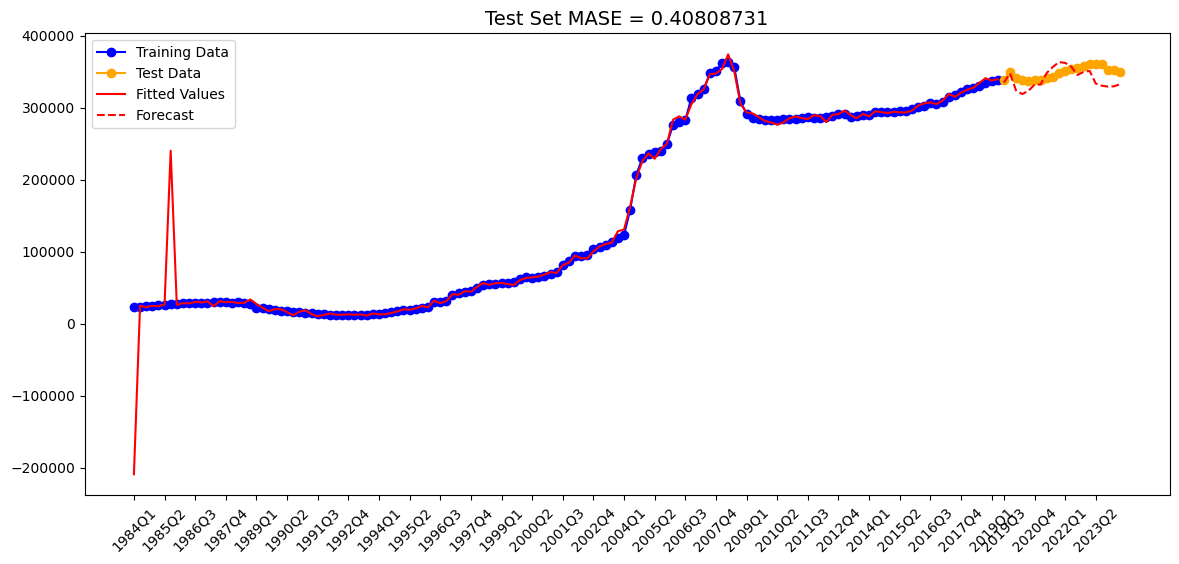

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.time,
         dep_test.deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')


plt.plot(date_test.time,
         sarima_fea.forecast(len(date_test),exog=test_features),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase_X,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.time[::5]])


rmse = np.sqrt(np.mean((np.array(dep_test.deposits) - np.array(y_preds))**2))
print("RMSE:", rmse)

mae = np.mean(np.abs(np.array(dep_test.deposits) - np.array(y_preds)))
print("MAE:", mae)

nom_mae = np.sqrt(np.mean((np.array(dep_test.deposits) - np.array(y_preds))**2))/np.mean(np.array(y_test))
print("normalized RMSE:", nom_mae)

nom_rmse = np.mean(np.abs(np.array(dep_test.deposits) - np.array(y_preds)))/np.mean(np.array(y_test))
print("noarmalized MAE:", nom_rmse)

# Calculate MAE
#mae = mean_absolute_error(dep_test.deposits,y_preds)
#print("Mean Absolute Error (MAE):", mae/np.mean(np.array(y_test)))
#np.mean(np.array(y_test)


# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()




